<a href="https://colab.research.google.com/github/akhilesh2510/Gold_Price_prediction/blob/main/Gold_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# **Data Collection and Processing**

In [ ]:
gold_dataset=pd.read_csv("/content/gld_price_data.csv")

In [ ]:
gold_dataset.shape

(2290, 6)

In [ ]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_dataset['Date'].value_counts()

Date
1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: count, Length: 2290, dtype: int64

In [ ]:
# Printing the last 5 Rows
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# Checking the number of missing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# **Correlation**

In [ ]:
X=gold_dataset
gold_dataset.drop(['Date'],axis=1,inplace=True)
correlation = gold_dataset.corr()

<Axes: >

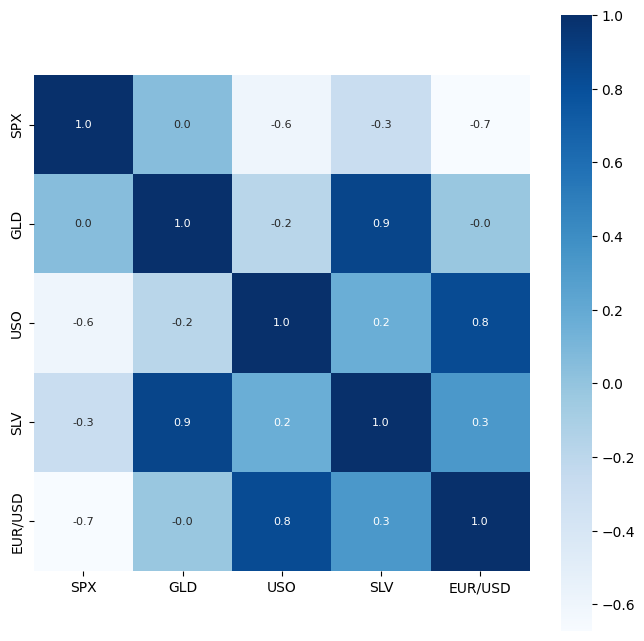

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [ ]:
# Correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-82-53b7499d2e42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

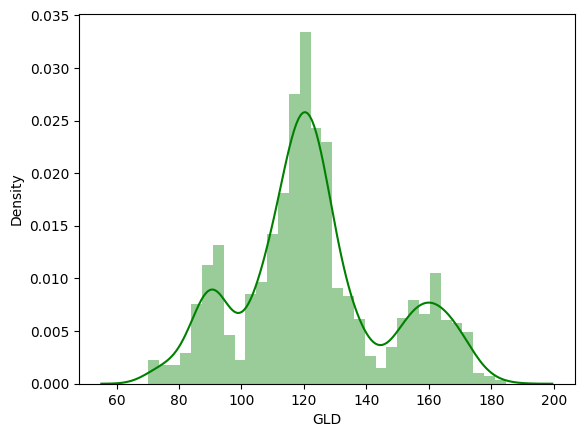

In [ ]:
# Checking the distribution of the GLD Price
sns.distplot(gold_dataset['GLD'],color='green')

In [ ]:
# Splitting the features and The Target
X=gold_dataset.drop(['GLD'],axis=1)
Y=gold_dataset['GLD']

print(X)
print(Y)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# **Splitting into Test Data and Training Data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)


RandomForestRegressor()

# **Model Evaluation**

```
# This is formatted as code
```



In [ ]:
test_data_prediction= regressor.predict(X_test)
print(test_data_prediction)

[168.51109925  82.08899981 116.04970036 127.60410083 120.65430151
 154.55839764 149.99409848 126.1906005  117.4754986  126.02020065
 116.69470098 172.34250077 141.35719855 167.86749847 115.21820005
 117.40870024 138.52670349 170.27100165 158.90990232 160.64279988
 155.13499992 125.22119968 176.64470012 156.64320302 125.23290044
  93.78739988  76.99050061 120.50139997 119.07909896 167.51799953
  88.08080046 125.20989999  91.11080041 117.64750039 121.16789959
 135.74220083 115.22110142 115.10030079 147.69419999 107.18940104
 104.42560236  87.31349818 126.50900036 117.82500011 153.83969915
 119.59540043 108.5605001  108.18629818  93.30470027 127.071898
  75.4058     113.70649916 121.15860014 111.12499919 118.73399867
 120.71589983 159.23119987 167.28970107 146.92889692  85.87459862
  94.41620041  86.659999    90.61450004 118.86990069 126.45480069
 127.37420025 170.79219998 122.37169946 117.44069861  98.66210018
 168.495802   143.3673986  132.15310203 121.16600211 120.80379961
 119.6426007

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("The squared error is: ",error_score)


The squared error is:  0.9896641661624905


In [ ]:
 Y_test=list(Y_test)

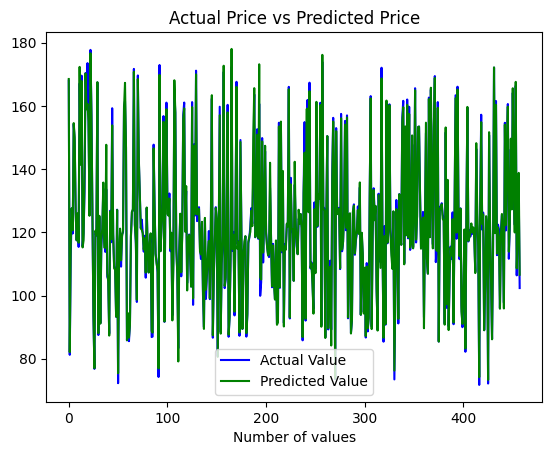

In [ ]:
plt.plot(Y_test,color='blue',label="Actual Value")
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.legend()
plt.show()